# 2021 인공지능 실습 4차시 - 기계학습 2
학번 & 이름: 2016160311 이재윤

실습 공지사항:
- 실습 활동 제출 기한: 6월 13일 오후 11시 59분
- 활동만 제출, 실습 과제 없음
- 6월 17일 수업 없음
- 기말 프로젝트 기한: 6월 18일

실습 내용:
- Logistic Regression
- MLP
- Cross Validation

## Credit Card Fraud Detection Dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# 1. import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
# 2. import data
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
raw_df = pd.read_csv(url)
# raw_df.head()
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# 3. view target counts
neg, pos = np.bincount(raw_df['Class'])
print(neg, pos)
print(pos/(neg+pos))

284315 492
0.001727485630620034


In [5]:
# 4. preprocess
cleaned_df = raw_df.copy()
cleaned_df.pop('Time')

eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [6]:
# 5. split data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

y_train = np.array(train_df.pop('Class'))
y_val = np.array(val_df.pop('Class'))
y_test = np.array(test_df.pop('Class'))

X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
# 6. logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# 7. check intercept
lr.intercept_

array([-8.65805356])

In [11]:
# 8. check model coefficient
print(train_df.columns)
odds = np.exp(lr.coef_[0])
print(odds)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Log Amount'],
      dtype='object')
[1.09080656 0.95521311 0.97169153 1.99254456 1.04426775 0.91446358
 0.95437966 0.81065523 0.86026094 0.51367925 0.93659838 1.00649395
 0.82154162 0.536654   0.87889818 0.74343278 1.10115346 0.90194107
 1.01325962 0.79436671 1.46141314 1.82698383 0.86078683 1.16001569
 0.93194393 0.89180081 0.50178991 0.66403668 1.01741702]


In [13]:
# 9. predict() method
y_pred_lr = lr.predict(X_val)
# print(X_val[:10])
print(y_pred_lr[:10])

[0 0 0 0 0 0 0 0 0 0]


In [15]:
# 10. predict_proba() method
y_pred_lr = lr.predict_proba(X_val)[:, 1]
print(y_pred_lr[:10])

[0.0005598  0.00002687 0.00001925 0.00005743 0.00192877 0.00164061
 0.00017773 0.0000553  0.00023979 0.00104261]


In [16]:
# 11. model score
lr.score(X_val, y_val)

0.9992538787333495

## Classification metrics

Precision and recall: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

AUROC: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

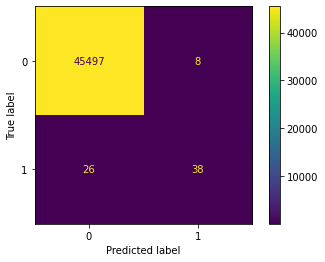

In [17]:
# 12. confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_val, y_val, normalize=None, values_format='d')

In [19]:
# 13. Precision(정밀도): 사기라고 식별된 카드 결제 중 실제로 사기였던 사례의 비율은?
from sklearn.metrics import precision_score

y_pred = lr.predict(X_val)
print(precision_score(y_val, y_pred))
print(38/(38+8))

0.8260869565217391
0.8260869565217391


In [20]:
# 14. Recall(재현율): 실제 사기인 카드 결제 중 정확히 사기였던 카드 결제의 비율은?
from sklearn.metrics import recall_score

y_pred = lr.predict(X_val)
print(recall_score(y_val, y_pred))
print(38/(38+26))

0.59375
0.59375


In [21]:
# 15. f1 score: harmonic mean of the precision and recall
# 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score

f1_score(y_val, y_pred)

0.6909090909090908

In [22]:
# 16. AUROC
from sklearn.metrics import roc_auc_score

y_pred = lr.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9665005905944403

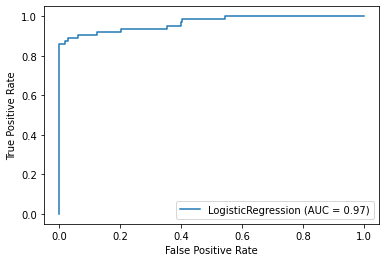

In [23]:
# 17. plot auroc curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_val, y_val)

## Abalone Dataset

In [24]:
# 18. import abalone data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header = None)
df.columns = ["gender", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]

onehot_df = pd.get_dummies(df.gender, prefix="gender")
df = pd.concat([onehot_df, df], axis=1).drop(["gender"], axis=1)
disc_label = pd.cut(df.rings, bins=[0, 9, 30], labels=[0, 1])
df = df.drop(["rings"], axis=1)
df = pd.concat([df, disc_label.to_frame()], axis=1)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = np.array(train_df.pop('rings'))
y_test = np.array(test_df.pop('rings'))

X_train = np.array(train_df)
X_test = np.array(test_df)

## Multilayer Perceptron (MLP)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [26]:
# 19. MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Cross Validation (CV)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

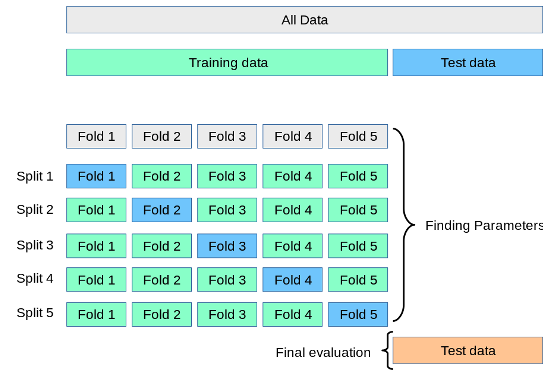

In [27]:
# 20. 5-fold cross validation
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)

In [31]:
# 21. print CV results
# cv_results
# cv_results.keys()
# cv_results['test_score']
np.mean(cv_results['test_score'])

0.8000608648174502

### Predefined scoring metrics
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [32]:
# 22. CV with multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)

In [35]:
# 23. print CV result
cv_results.keys()
print(np.mean(cv_results['test_accuracy']))
print(np.mean(cv_results['test_precision']))
print(np.mean(cv_results['test_recall']))
print(np.mean(cv_results['test_f1']))
print(np.mean(cv_results['test_roc_auc']))

0.8000608648174502
0.7933193516457335
0.8121270971570371
0.8016788595831519
0.8806967106529177


### Finding model parameters with cross validation

In [36]:
# 24. testing model parameter 1
mlp2 = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp2, X_train, y_train, scoring=scoring, cv=5)

In [37]:
print(np.mean(cv_results['test_accuracy']))
print(np.mean(cv_results['test_precision']))
print(np.mean(cv_results['test_recall']))
print(np.mean(cv_results['test_f1']))
print(np.mean(cv_results['test_roc_auc']))

0.8012575745370245
0.7875252979733366
0.8247217277157397
0.8050470018870237
0.8829406938442599


In [38]:
# 25. using loop
h_size = [(200,), (100, 2), (30, )]
for h in h_size:
  mlp = MLPClassifier(hidden_layer_sizes=h, max_iter=1000, random_state=42)
  cv_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)
  print('hidden layer sizes', h)
  print(np.mean(cv_results['test_accuracy']))
  print(np.mean(cv_results['test_precision']))
  print(np.mean(cv_results['test_recall']))
  print(np.mean(cv_results['test_f1']))
  print(np.mean(cv_results['test_roc_auc']))
  print("\n")

hidden layer sizes (200,)
0.8012575745370245
0.7875252979733366
0.8247217277157397
0.8050470018870237
0.8829406938442599


hidden layer sizes (100, 2)
0.805449638838914
0.7912360854003787
0.8295427163690638
0.809537596308175
0.8830333363124497


hidden layer sizes (30,)
0.7991631087600582
0.7878763439987575
0.8175325025624426
0.8022851570519662
0.8812894259886843




In [39]:
# 26. final model evaluation on test data
mlp_final = MLPClassifier(hidden_layer_sizes=(100, 2), max_iter=1000, random_state=42)
mlp_final.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [40]:
# 27. accuracy
mlp_final.score(X_test, y_test)

0.7954545454545454

In [41]:
# 28. f1
y_pred = mlp_final.predict(X_test)
f1_score(y_test, y_pred)

0.7966706302021402

In [42]:
# 29. auroc
y_pred = mlp_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8783390092436253